In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 17.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=c84d74e43dace2cb2e376bddd20e8c0e7b6e17a471ad840fe219c8491f32067e
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


**LOAD THE NECESSARY LIBRARIES**

In [88]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import yfinance as yf

In [118]:
df=web.DataReader("MSFT",data_source='yahoo',start='01-01-2012',end='17-12-2020')         # Stock used -> Microsoft
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.849474
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.363672
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.592201
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.943169
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.641172


In [119]:
df.shape

(2256, 6)

Text(0.5, 1.0, 'Graph of Closing price')

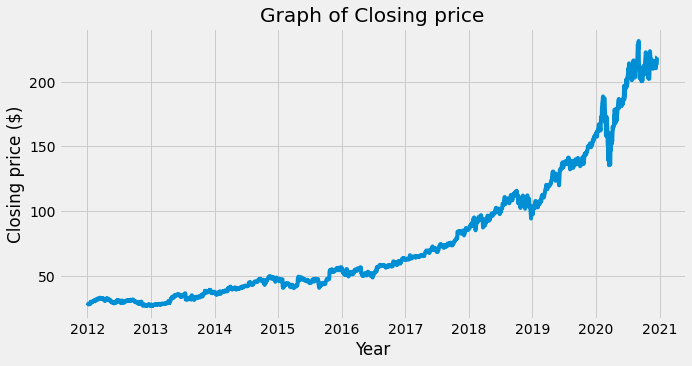

In [120]:
plt.style.use('fivethirtyeight')
plt.figure(1,(10,5))
graph=plt.plot(df['Close'])
plt.xlabel("Year")
plt.ylabel("Closing price ($)")
plt.title("Graph of Closing price")

**Create the dataframe for close price**

In [141]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
#test_len=len(data)-train_len
print("train_len=",training_data_len)
#print("test_len=",test_len)
#type(dataset)

train_len= 1805


**Scaling the data**

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler=MinMaxScaler(feature_range=(0,1),copy=True)
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00194856],
       [0.00501753],
       [0.00638153],
       ...,
       [0.91465321],
       [0.93974086],
       [0.94042286]])

In [125]:
train_data=scaled_data[0:training_data_len,:]

In [126]:
x_train,y_train=[],[]
for i in range(60,len(train_data)):                 #for the next 60 days
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print("x_train",x_train)
    print("y_train",y_train)
    print()

x_train [array([0.00194856, 0.00501753, 0.00638153, 0.00847623, 0.00667381,
       0.00716095, 0.00657638, 0.00794037, 0.00915822, 0.00920693,
       0.00906079, 0.00852494, 0.01627045, 0.01636788, 0.01446804,
       0.01553974, 0.01524746, 0.01393218, 0.01578332, 0.01539361,
       0.0171473 , 0.01743959, 0.01885229, 0.01865744, 0.01938815,
       0.02089828, 0.02143414, 0.02011886, 0.02050857, 0.01890101,
       0.01792673, 0.02396727, 0.02377241, 0.02469797, 0.02386984,
       0.02435698, 0.02489282, 0.02425955, 0.02679267, 0.02615939,
       0.02883866, 0.02781567, 0.02645167, 0.02528254, 0.02664653,
       0.02747466, 0.02737724, 0.02762081, 0.03068978, 0.03117693,
       0.03156663, 0.03034878, 0.02840023, 0.02737724, 0.02698753,
       0.02742595, 0.02747466, 0.03030008, 0.02995908, 0.02835151])]
y_train [0.028010513869453108]



In [97]:
type(x_train)   #list

list

**Reshaping x_train**

In [127]:
x_train,y_train=np.array(x_train),np.array(y_train)     #convert into array to use in lstm model
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1745, 60, 1)

**LSTM Model**

In [128]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [129]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [130]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [131]:
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
1745/1745 [==============================] - 12s 5ms/step - loss: 5.2968e-04
Epoch 2/5
1745/1745 [==============================] - 10s 6ms/step - loss: 1.2487e-04
Epoch 3/5
1745/1745 [==============================] - 10s 5ms/step - loss: 1.0553e-04
Epoch 4/5
1745/1745 [==============================] - 10s 5ms/step - loss: 1.0723e-04
Epoch 5/5
1745/1745 [==============================] - 10s 5ms/step - loss: 7.3019e-05


In [132]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
type(y_test) 

numpy.ndarray

In [133]:
#convert into array X_test
x_test=np.array(x_test)
#reshape it
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(451, 60, 1)

In [134]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)   

In [135]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.0639033518450751

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


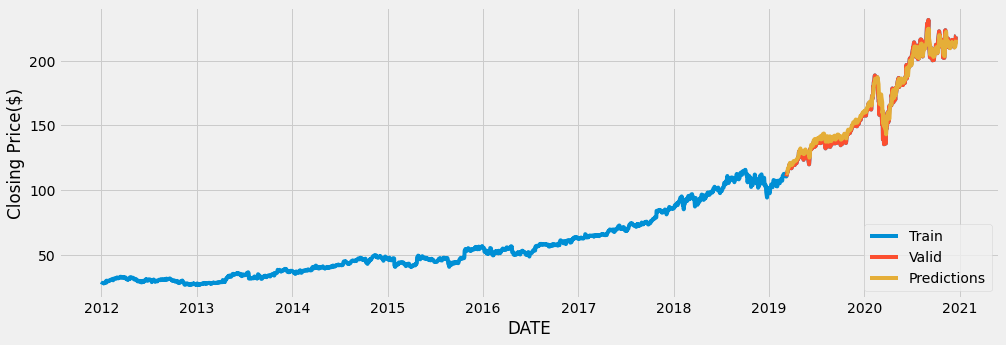

In [136]:
train1=data[:training_data_len]
validation=data[training_data_len:]
validation['Predictions']=predictions
plt.figure(figsize=(15,5))
plt.xlabel("DATE")
plt.ylabel("Closing Price($)")
plt.plot(df['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

**Prediction value of the next day**

In [137]:
sample=web.DataReader('MSFT',data_source='yahoo',start='01-01-2012',end='17-12-2020')
new_df=sample.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[217.65282]]


**Actual price on that day**

In [139]:
sample2=web.DataReader('MSFT',data_source='yahoo',start='18-12-2020',end='18-12-2020')
print(sample2['Close'])

Date
2020-12-18    218.589996
Name: Close, dtype: float64


**Sentimental Analysis on Stocks**

In [116]:
from urllib.request import urlopen, Request
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [117]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [85]:
amzn = news_tables['AMZN']

amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    a_text = table_row.a.text
    td_text = table_row.td.text
    print(a_text)
    print(td_text)
    if i == 2:
        break

Dow Jones Futures: Stock Market Rally Ready For A Melt Up? Analyzing Apple, Amazon, Palantir
Feb-12-21 09:15PM  
A Look at Cerence's Results
04:35PM  
Google, Microsoft, Qualcomm Protest Nvidias Acquisition of Arm Ltd.
04:34PM  


In [86]:
parsed_news = []

for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()
        if len(date_scrape) == 1:
            time = date_scrape[0]  
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        ticker = file_name.split('_')[0]
        parsed_news.append([ticker, date, time, text])
        

In [87]:
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)

parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-02-12,09:15PM,"Dow Jones Futures: Stock Market Rally Ready For A Melt Up? Analyzing Apple, Amazon, Palantir",0.0,0.741,0.259,0.4939
1,AMZN,2021-02-12,04:35PM,A Look at Cerence's Results,0.0,1.000,0.000,0.0000
2,AMZN,2021-02-12,04:34PM,"Google, Microsoft, Qualcomm Protest Nvidias Acquisition of Arm Ltd.",0.2,0.800,0.000,-0.2500
3,AMZN,2021-02-12,03:00PM,Amazon Stock: Is It A Buy As Jeff Bezos Sets Plan To Relinquish CEO Role,0.0,0.884,0.116,0.1779
4,AMZN,2021-02-12,02:36PM,A Look at What's Going on With SpaceX,0.0,1.000,0.000,0.0000
